1) Carga de librerias necesarias

In [21]:
# Manipulación de Datos
import numpy as np
import pandas as pd

# Modelado y Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Validación y Selección de Modelos
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Estadísticas y Optimización de Hiperparámetros
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




2) Carga de bases de datos

In [22]:
#Se guarda en variables los datos de los archivos csv
client_train = pd.read_csv('client_train.csv')
invoice_train = pd.read_csv('invoice_train.csv')

C:\Users\luiso\AppData\Local\Temp\ipykernel_15604\1930133614.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('invoice_train.csv')


3) Verificar Unicidad de client_id:

In [23]:
#En la base de datos client_train se cuenta el número de veces que se repite el id de un cliente
client_counts = client_train['client_id'].value_counts()
print(client_counts.head())

client_id
train_Client_0        1
train_Client_59347    1
train_Client_5936     1
train_Client_59359    1
train_Client_59358    1
Name: count, dtype: int64


In [24]:
#En la base de datos invoice_train se cuenta el número de veces que se repite el id de un cliente
invoice_counts = invoice_train['client_id'].value_counts()
print(invoice_counts.head())


client_id
train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
Name: count, dtype: int64


4) Se contruye un historico de consumo

In [25]:
# Se convierte la variable 'invoice_date' a formato fecha 
invoice_train['invoice_date'] = pd.to_datetime(invoice_train['invoice_date'])

# Se ordena 'invoice_train' por 'client_id' y 'invoice_date'
invoice_train_sorted = invoice_train.sort_values(by=['client_id', 'invoice_date'])

# Se crea una variable que contiene el historico de facturación de cada cliente y los datos de la base de datos 'client_train'
historico_consumo = pd.merge(invoice_train_sorted, client_train, on='client_id', how='left')

5) Análisis Exploratorio de Datos (EDA)

In [26]:
# Total de datos
print(historico_consumo.shape)

(4476749, 21)


In [27]:
# Se observa el historico de consumo
historico_consumo.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,...,0,3685,3809,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,...,0,3809,3950,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,...,0,3950,4112,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,...,0,4112,4271,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,...,0,4271,4453,4,ELEC,60,11,101,31/12/1994,0.0


In [28]:
# Se describe el historico de consumo
historico_consumo.describe()

,invoice_date,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,disrict,client_catg,region,target
count,4476749,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2013-03-18 07:42:34.444127232,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02
min,1977-06-09 00:00:00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00
25%,2010-01-19 00:00:00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00
50%,2013-07-10 00:00:00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00
75%,2016-09-03 00:00:00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00
max,2019-12-07 00:00:00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00
std,NaN,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01


In [29]:
# Se observa la distribución de las variables
historico_consumo.value_counts()

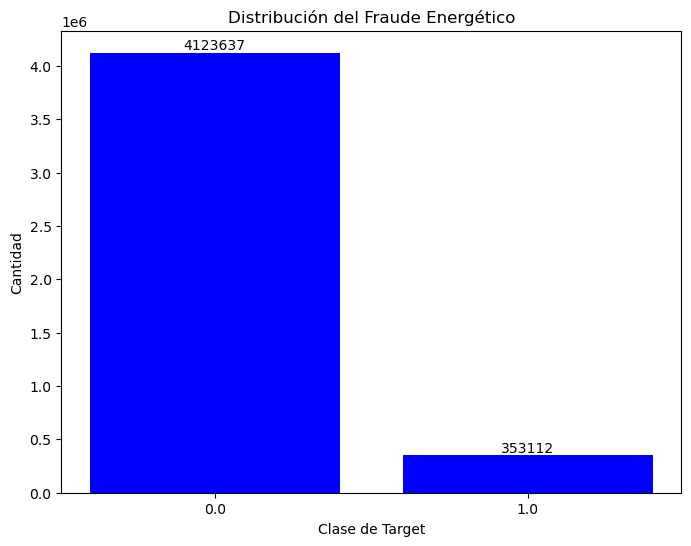

In [ ]:
# Conteo de la variable 'target' después del undersampling
target_counts = historico_consumo['target'].value_counts()

# Creación del gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color='blue')
plt.title('Distribución del Fraude Energético')
plt.xlabel('Clase de Target')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejor legibilidad

# Añadir etiquetas de recuento encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()




6) Feature engeniering

In [ ]:
#Se eliminan las columnas que no se utilizarán
historico_consumo = historico_consumo.drop(['invoice_date', 'creation_date'], axis=1)

# Lista de columnas categóricas para convertir a formato numérico mediante One-Hot Encoding
columns_to_encode = ['tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'client_catg', 'region', 'counter_type']

# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Ajusta el codificador de etiquetas al 'client_id' y transforma 'client_id' a valores numéricos
historico_consumo['client_id_encoded'] = label_encoder.fit_transform(historico_consumo['client_id'])

# Se elimina la columna 'client_id' original
historico_consumo = historico_consumo.drop(['client_id'], axis=1)

# Aplica la codificación One-Hot a 'historico_consumo'
historico_consumo_encoded = pd.get_dummies(historico_consumo, columns=columns_to_encode)


In [ ]:
# Verificar tipo de datos
historico_consumo_encoded.dtypes

counter_number          int64
counter_coefficient     int64
consommation_level_1    int64
consommation_level_2    int64
consommation_level_3    int64
                        ...  
region_372               bool
region_379               bool
region_399               bool
counter_type_ELEC        bool
counter_type_GAZ         bool
Length: 125, dtype: object

7. Balanceo del dataset con RandomUnderSampler

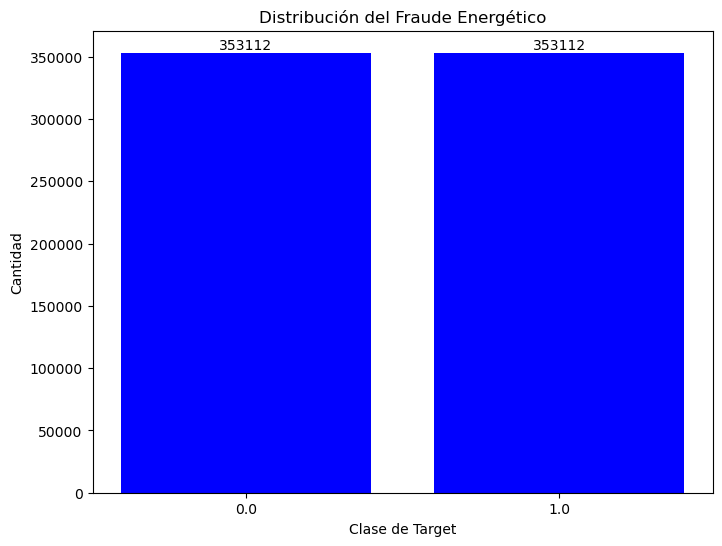

In [ ]:
X = historico_consumo_encoded.drop(['target'], axis=1)
y = historico_consumo_encoded['target']

# Inicializar el objeto de undersampling
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling a tus datos
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Conteo de la variable 'target' después del undersampling
target_counts = y_resampled.value_counts()

# Creación del gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color='blue')
plt.title('Distribución del Fraude Energético')
plt.xlabel('Clase de Target')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejor legibilidad

# Añadir etiquetas de recuento encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()



8. Reduccion de dimensionalidad

Número original de características: 124
Número reducido de características: 37


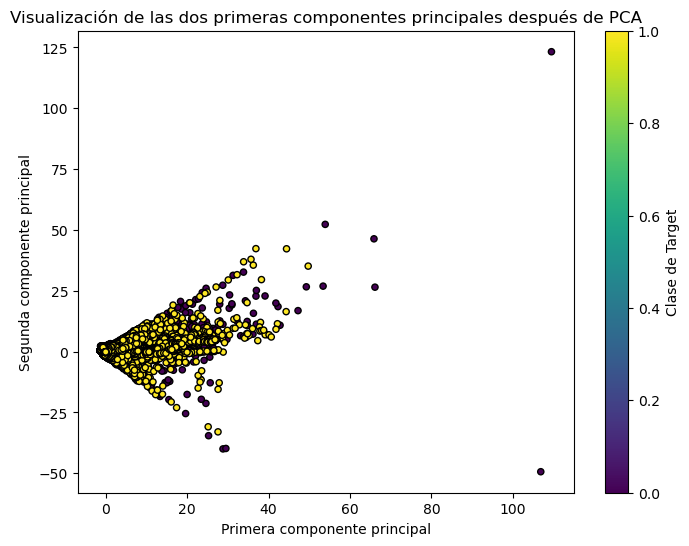

In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.99)
X_resampled_pca = pca.fit_transform(X_resampled)

# Mostrar el resultado de la reducción de dimensionalidad
print(f'Número original de características: {X_resampled.shape[1]}')
print(f'Número reducido de características: {X_resampled_pca.shape[1]}')

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, cmap='viridis', edgecolor='k', s=20)
plt.title('Visualización de las dos primeras componentes principales después de PCA')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.colorbar(label='Clase de Target')
plt.show()


9. Estandarización de datos

c:\Users\luiso\anaconda3\envs\fraud-detection-environment\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

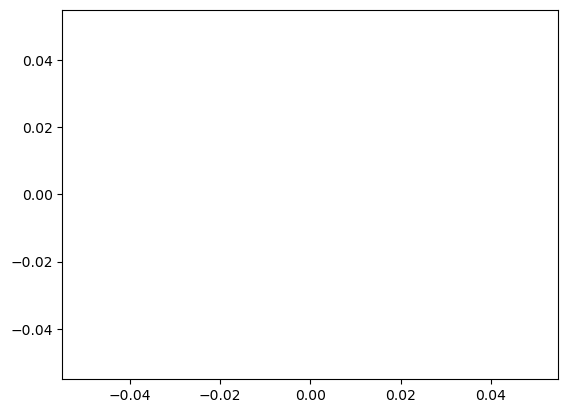

In [ ]:
# Convertir tipos de datos para reducir el uso de memoria
X_resampled = X_resampled.astype({col: 'float32' for col in X_resampled.select_dtypes(include=['float64']).columns})
X_resampled = X_resampled.astype({col: 'int32' for col in X_resampled.select_dtypes(include=['int64']).columns})

# Estandarizar los datos
scaler = StandardScaler()

# Actualizar la selección de columnas numéricas para reflejar los nuevos tipos de datos
numeric_cols_resampled = X_resampled.select_dtypes(include=['float32', 'int32']).columns

# Aplicar estandarización a las columnas numéricas de X_resampled
X_resampled[numeric_cols_resampled] = scaler.fit_transform(X_resampled[numeric_cols_resampled])

# Visualizar los datos estandarizados de la primera columna numérica
column_to_visualize = numeric_cols_resampled[0]

# Crear un histograma de la columna seleccionada
sns.histplot(X_resampled[column_to_visualize], kde=True)
plt.title(f'Distribución de {column_to_visualize} después de la estandarización')
plt.xlabel(column_to_visualize)
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Dividir el conjunto de datos estandarizado en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(historico_consumo_encoded.drop(['target'], axis=1), 
                                                    historico_consumo_encoded['target'], 
                                                    test_size=0.2,  # 20% para prueba
                                                    random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3581399, 124)
X_test shape: (895350, 124)
y_train shape: (3581399,)
y_test shape: (895350,)


10) Entrenamiento de un arbol de de desición

Accuracy: 0.9765901602725191
Precision: 0.846946325120402
Recall: 0.8585478370385046


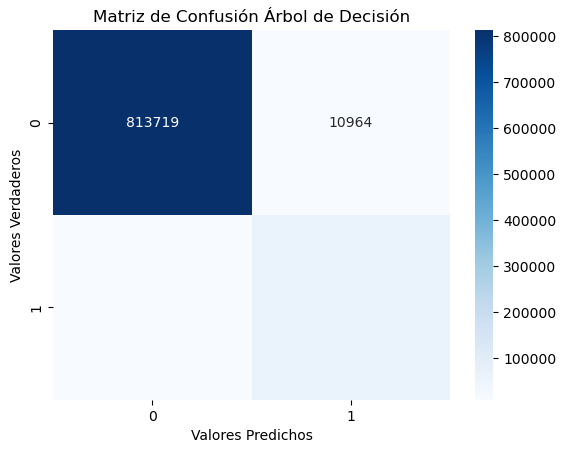

In [ ]:
# 1. Inicializar y entrenar el Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Utilizar el modelo entrenado para hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# 2. Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 3. Imprimir los resultados del rendimiento
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# 4. Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Árbol de Decisión')
plt.show()
